## Imports, FileIO, and Helper Functions

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim_folder = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/sim files/'
gen1 = pd.read_csv(sim_folder+'Simu_Leaf_Gen1.txt', names=['Time','Current'])
gen3 = pd.read_csv(sim_folder+'Simu_Leaf_Gen3.txt', names=['Time','Current'])
sim1 = pd.read_csv(sim_folder+'Simu_1.txt', names=['Time','Current'])
normalized_sim = pd.read_csv(sim_folder+'simu_normalized.txt', names=['Time','Current'])

In [24]:
def plot_current(dataframe, xlimit=[], scale_factor=1):
    plt.plot(dataframe['Time']/3600, dataframe['Current']*scale_factor)
    if xlimit:
        plt.xlim(xlimit)
    plt.xlabel('Time [Hr]', fontsize=16)
    plt.ylabel('Current [A]', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plt.title('Dynamic Current Profile')
    
def get_soc(df, nom_capacity, init_soc=0.5, scale_factor=1):
    soc = [init_soc]
    last_time = 0
    for index, row in df.iterrows():
        time = row['Time'] - last_time
        last_time = row['Time']
        soc.append(soc[index] + (time/3600)*row['Current']*scale_factor/nom_capacity)
    return soc

def plot_soc(df, nom_capacity, init_soc=0.5, scale_factor=1, xlimit=[], ylimit=[]):
    plt.plot(df['Time']/3600, np.array(get_soc(df, nom_capacity, init_soc, scale_factor)[:-1])*100)
    if xlimit:
        plt.xlim(xlimit)
    if ylimit:
        plt.ylim(ylimit)
    plt.xlabel('Time [Hr]', fontsize=16)
    plt.ylabel('SOC [%]', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()

## Plotting

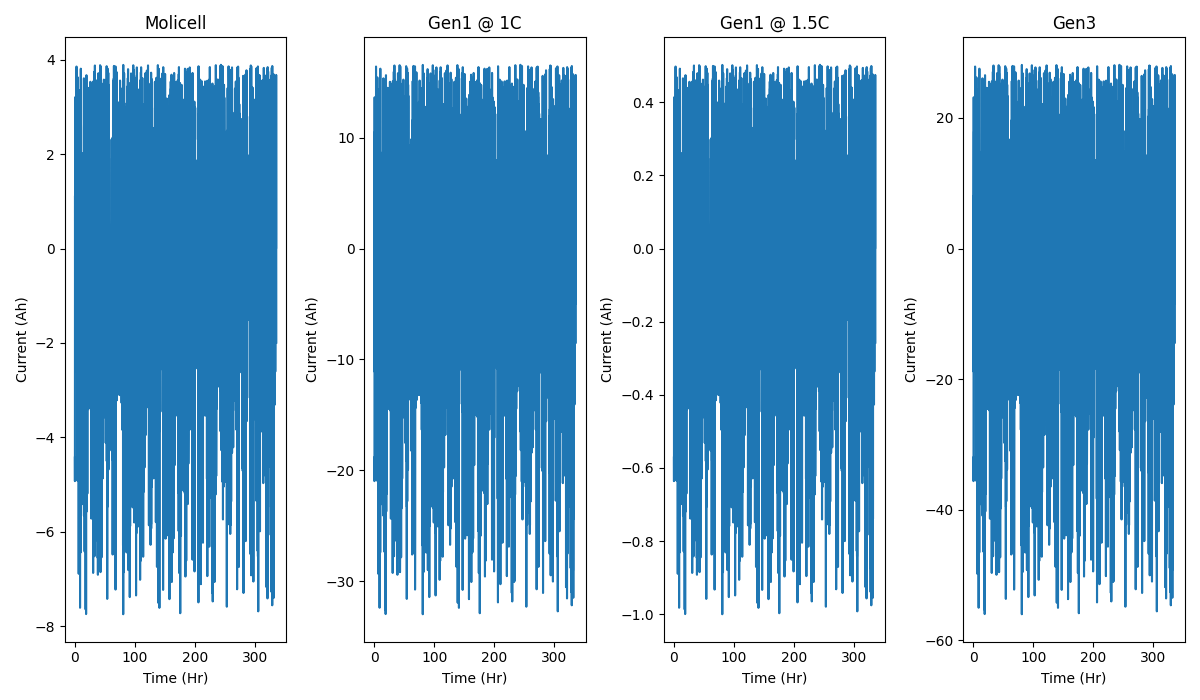

In [6]:
%matplotlib widget
plt.figure(figsize=(12,7))
plt.subplot(141)
plot_current(sim1)#, xlimit=[0,72])
plt.title('Molicell')
plt.subplot(142)
plot_current(gen1)#, xlimit=[0,72])
plt.title('Gen1 @ 1C')
plt.subplot(143)
plot_current(normalized_sim)#, xlimit=[0,72], scale_factor=33*1.5)
plt.title('Gen1 @ 1.5C')
plt.subplot(144)
plot_current(gen3)#, xlimit=[0,72])
plt.title('Gen3')
plt.tight_layout()

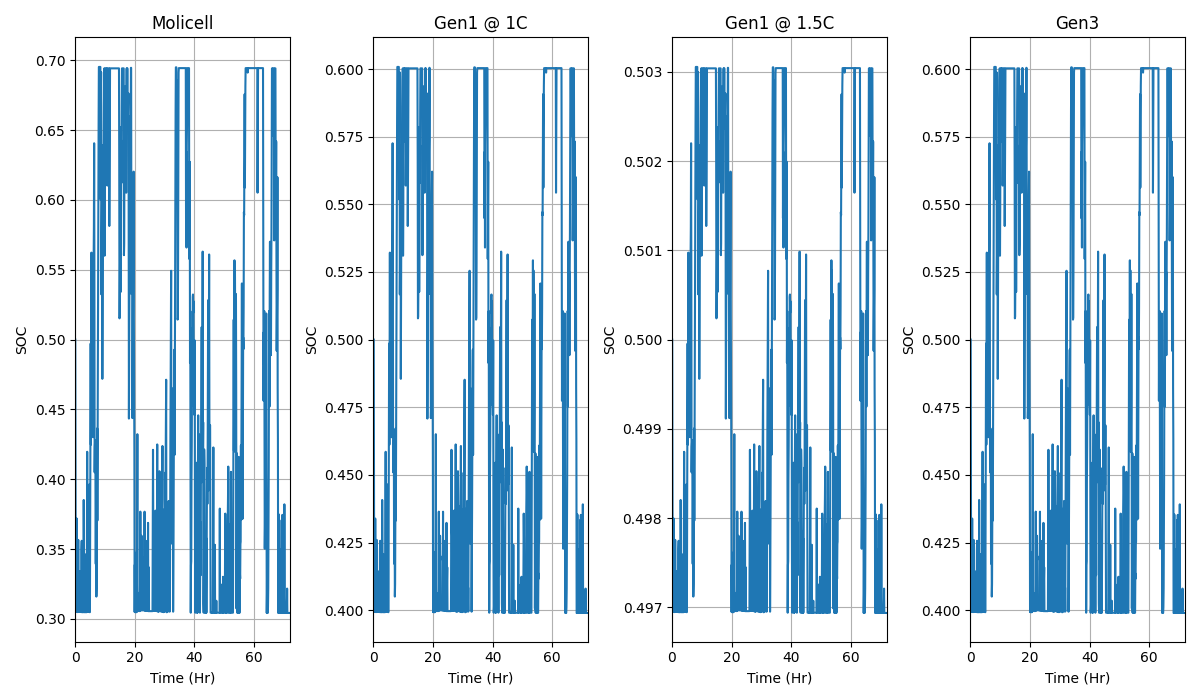

In [7]:
%matplotlib widget
plt.figure(figsize=(12,7))
plt.subplot(141)
plot_soc(sim1, 4, xlimit=[0,72])
plt.title('Molicell')
plt.subplot(142)
plot_soc(gen1, 33, xlimit=[0,72])
plt.title('Gen1 @ 1C')
plt.subplot(143)
plot_soc(normalized_sim, 33, xlimit=[0,72])# scale_factor=33*1.5)
plt.title('Gen1 @ 1.5C')
plt.subplot(144)
plot_soc(gen3, 56, xlimit=[0,72])
plt.title('Gen3')
plt.tight_layout()

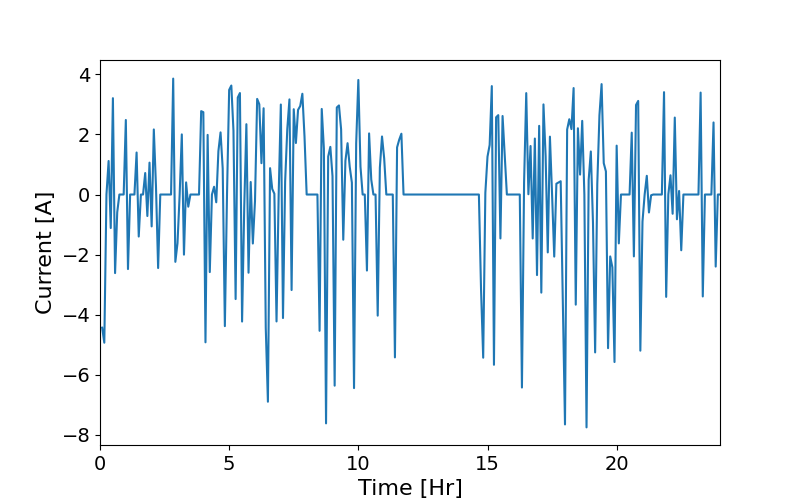

In [17]:
%matplotlib widget
plt.figure(figsize=(8,5))
plt.subplot(111)
plot_current(sim1, xlimit=[0,24])
# plt.savefig('C:\\Users\\seanb\\OneDrive\\Documents\\PRIMED\\Images\\CNN\\CurrentSeries.png', dpi=300)

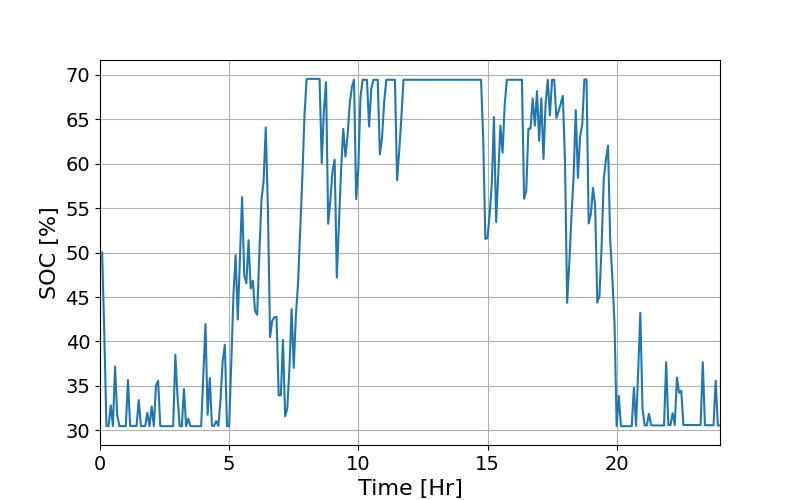

In [26]:
%matplotlib widget
plt.figure(figsize=(8,5))
plt.subplot(111)
plot_soc(sim1, 4, xlimit=[0,24])
plt.savefig('C:\\Users\\seanb\\OneDrive\\Documents\\PRIMED\\Images\\CNN\\SOCvsTime.png', dpi=300)